<a href="https://colab.research.google.com/github/askot19/Analise_de_dados/blob/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/ex108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos práticos em Ciência de Dados. Meu objetivo aqui é implementar o que já conheço da linguagem Python e desenvolver projetos completos acerca da área. Como bibliografia básica utlizarei o **Projetos de Ciência de Dados com Python - Stephen Klosterman**, que visa tratar dados desde o tipo de a análise mais simples (exploratória de dados) até aplicações envolvendo modelos preditivos e Machine Learning. As ferramentas que utilizarei serão principalmente o **Colaboratory do Google** e o **Jupyter Notebook - Anaconda**. O intuito aqui é consumir toda a literatura e me inserir do dia-a-dia de um profissional de dados, atuando tanto como Cientista quanto como Analista de Dados. Pretendo me tornar um profissional mais qualificado após estes desenvolvimentos.
</p>

---

# 1. Exploração e Limpeza de Dados

#### Objetivos

Neste primeiro capítulo serão dados os primeiros passos com Python para ciência de dados, após a conclusão dele serei capaz de lidar com dados tabulares em Python, realizar análise exploratória de dados, Garantir a qualidade dos dados que estou utilizando e realizar a limpeza dos dados.

## Características do Dataset

* `ID`: Código de identificação da conta
* `LIMIT_BAL`: Valor do Crédito fornecido (em novos dólares taiwaneses (NT)) inclusive o crédito do consumidor individual e familiar (complementar).
* `SEX`: Gênero (1 = masculino; 2 = feminino).
* `EDUCATION`: Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).
* `MARRIAGE`: Estado civil (1 = casado; 2 = solteiro; 3 = outros).
* `AGE`: Idade (ano).
* `PAY_1-PAY_6`: Registro de pagamentos passados. Pagamentos mensais passados, registrados de setembro a abril. Ex.: PAY_1 representa o status de reembolso em setembro; PAY_2 representa o status de reembolso em agosto, e a assim por diante. Os registros são armazenados da seguinte maneira -2 significa que a conta começou o mês com o saldo zerado e nunca foi usado crédito algum; -1 = conta teve pagamento integral do valor devido; 0 significa que ao menos foi realizado o pagamento mínimo, mas não foi paga a fatura integral (o saldo restante foi carregado para o mês seguinte); 1 = atraso de um mês de pagamento; 2 = atraso de dois meses de pagamento até chegar em 9 = atraso de nove meses ou mais no pagamento.
* `BILL_AMT1-BILL_AMT6`: Valor da fatura (em novos dólares taiwaneses). BILL_ATM1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor da fatura em agosto; e assim por diante até BILL_AMT6, que representa o valor da fatura em abril.
* `PAY_AMT1-PAY_AMT6`: Valor de pagamentos anteriores (novos dólares taiwaneses). PAY_AMT1 representa o valor pago em setembro; PAY_AMT2 representa o valor pago em agosto; e assim por diante até PAY_AMT6, que representa o valor pago em abril.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt #pacote de gráficos
#Renderização automática
%matplotlib inline
import matplotlib as mpl #Funções gráficas adicionais
mpl.rcParams['figure.dpi'] = 400 #Resolução de 400dpi para as imagens
mpl.rcParams['font.size'] = 4 #Ajuste do tamanho da fonte
import numpy as np
import seaborn as sns

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/askot19/Analise_de_dados/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/Chapter_1_cleaned_data.csv')

In [37]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [38]:
amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [39]:
df[amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

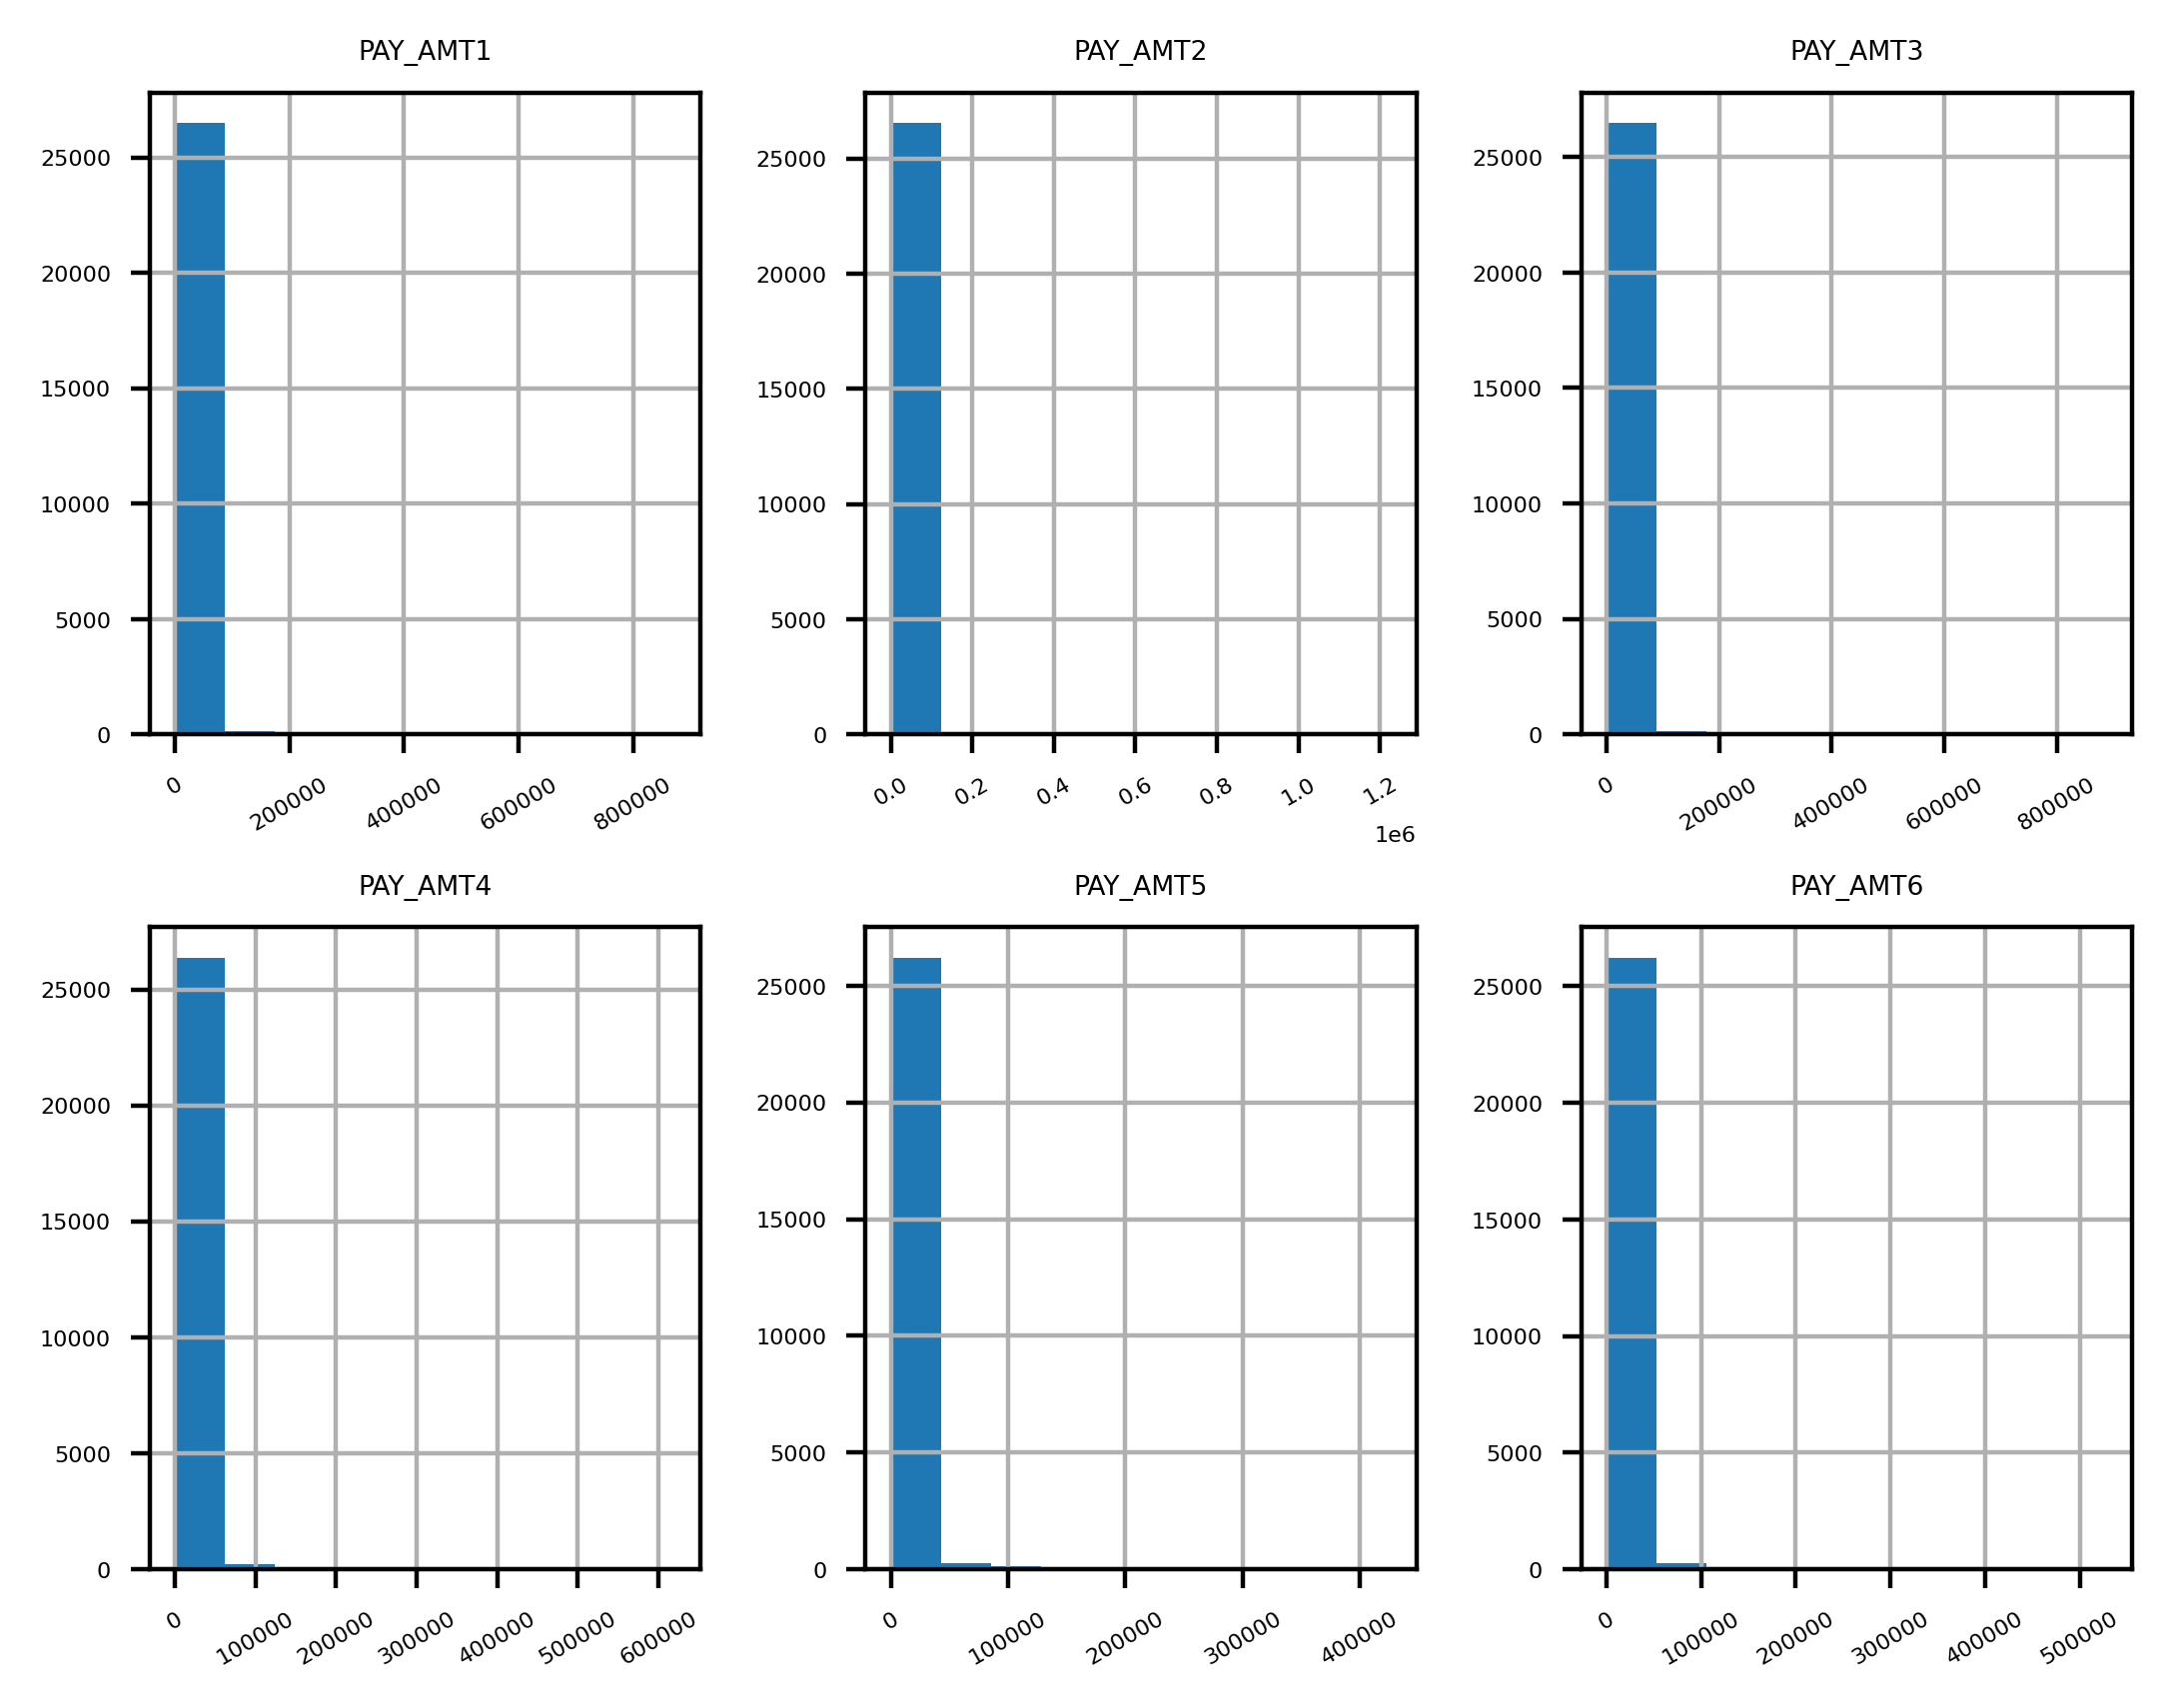

In [40]:
df[amt_feats].hist(layout = (2,3))

In [41]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [42]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

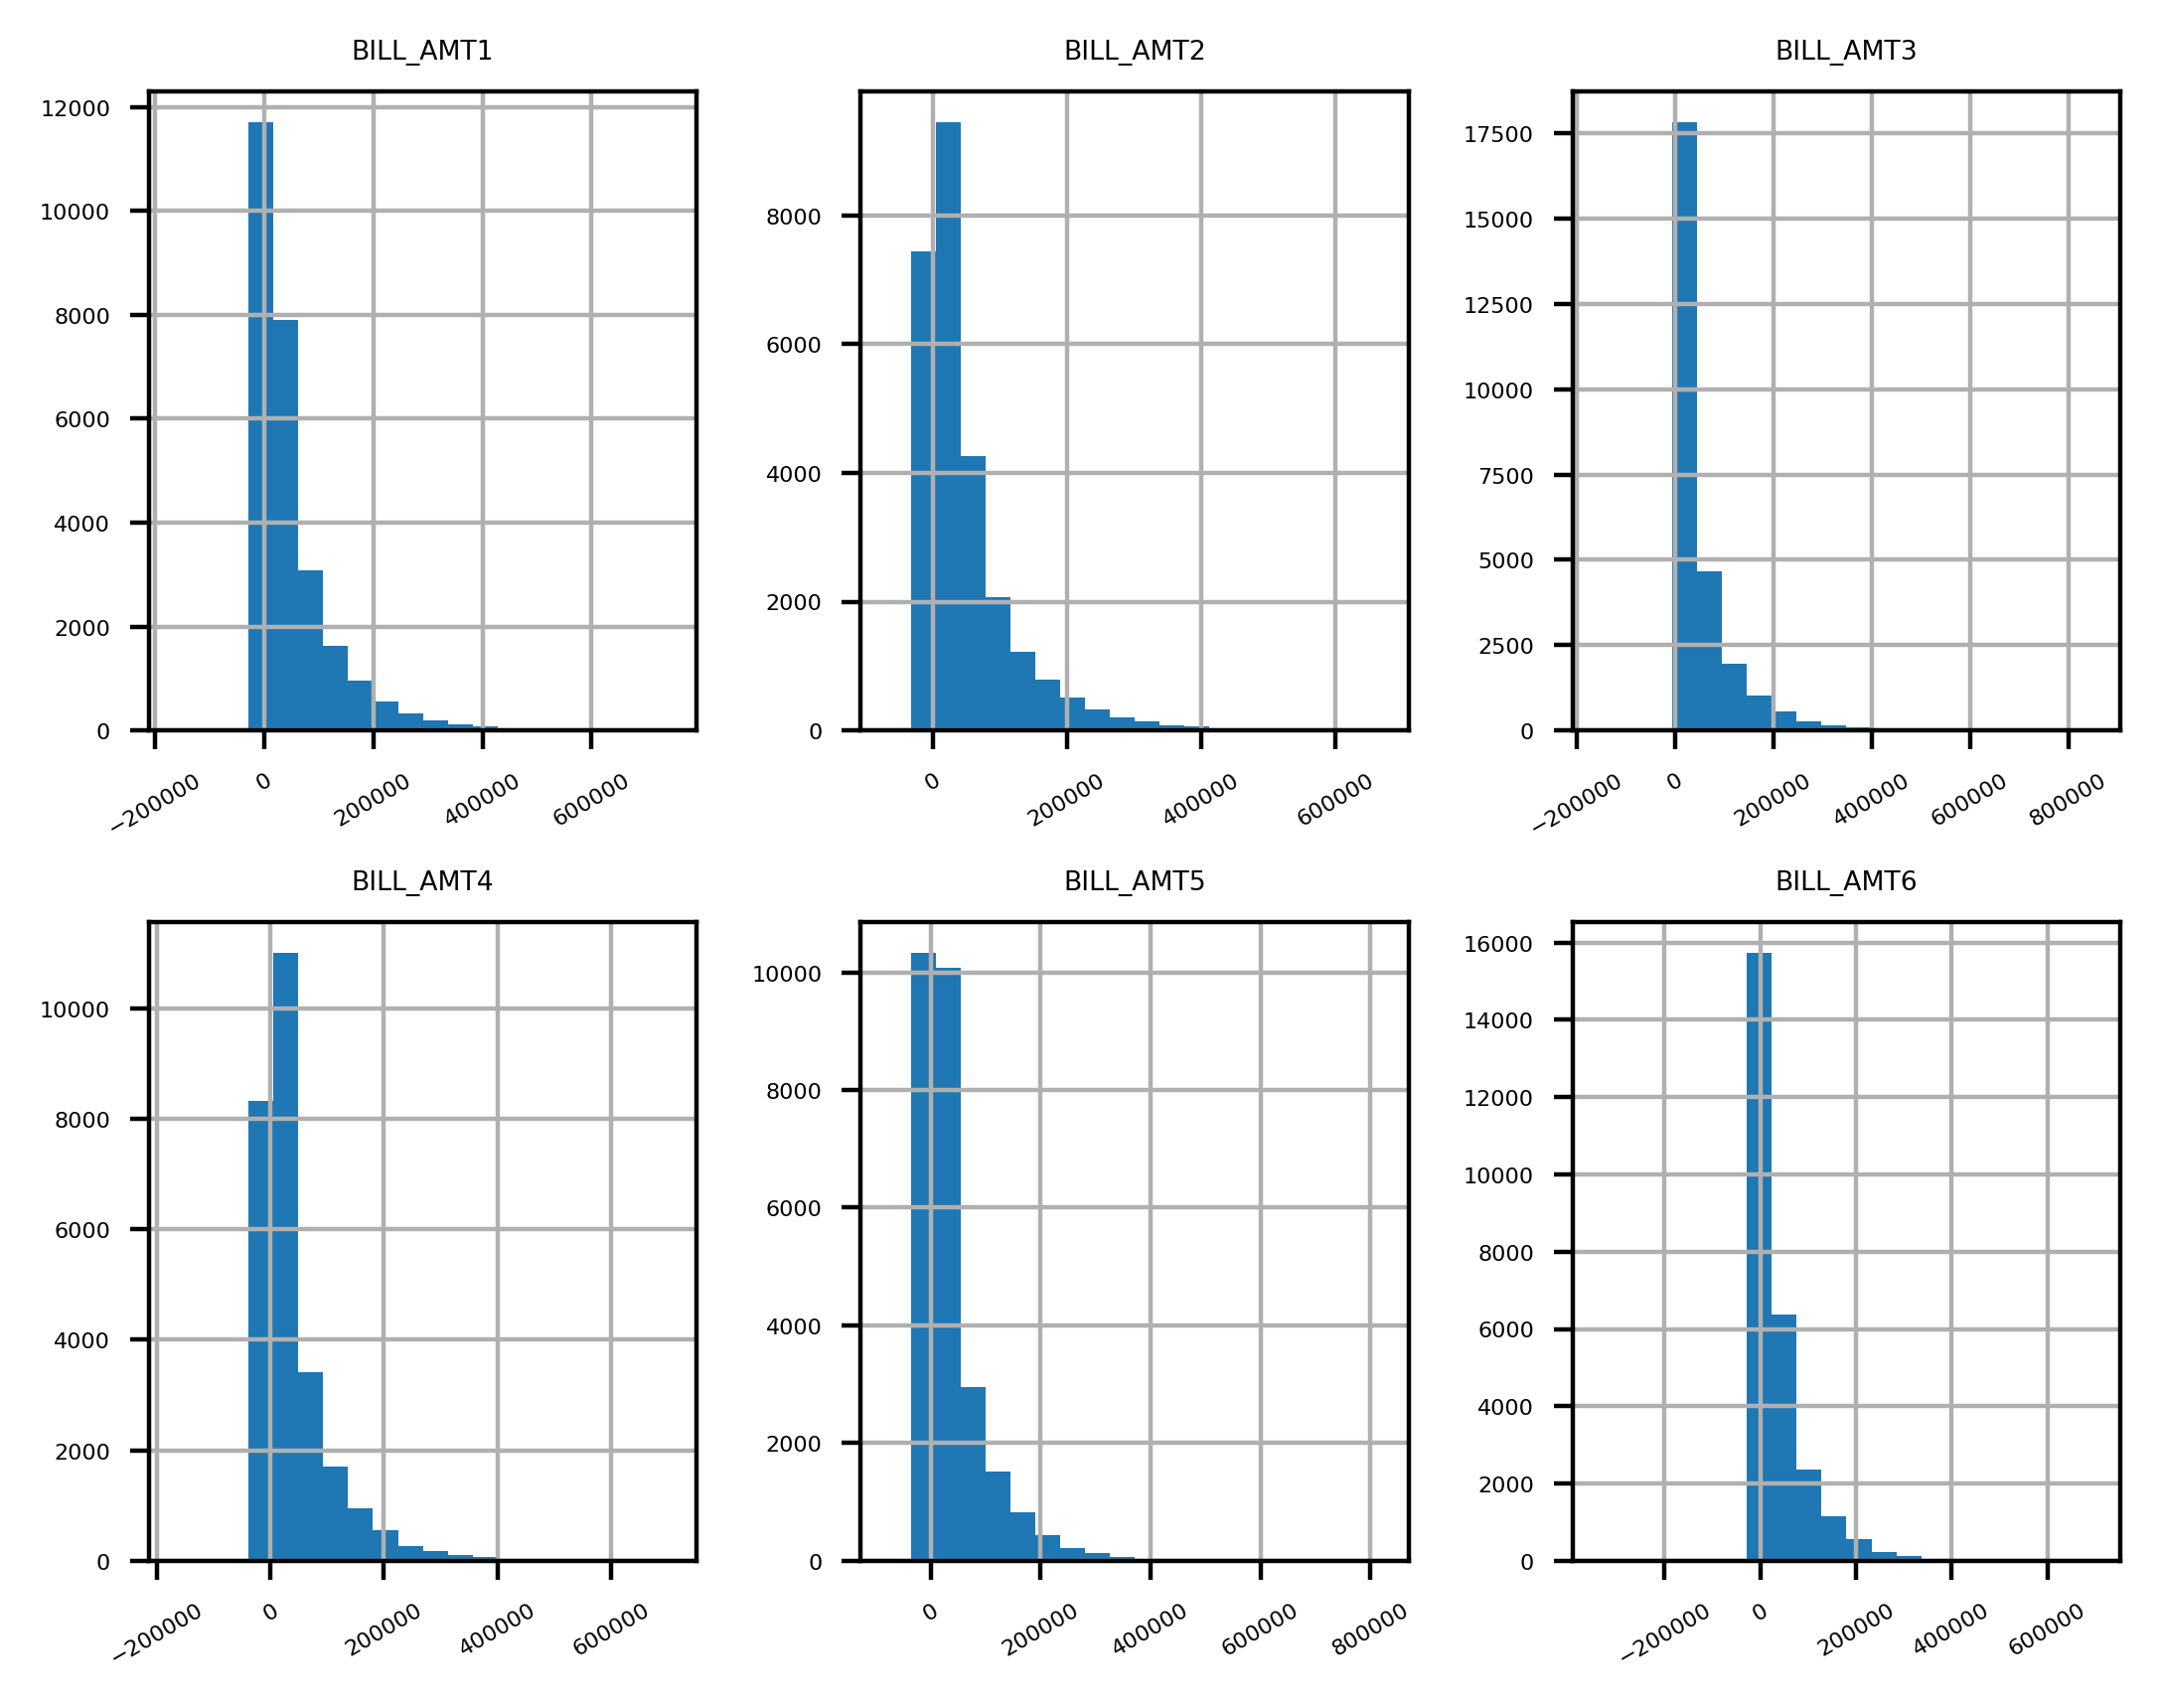

In [48]:
df[bill_feats].hist(bins = 20, layout = (2,3), xrot=30)

In [49]:
zero_mask_bill = (df[bill_feats] == 0)
zero_mask_bill.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,False,False,False,True,True,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [50]:
zero_mask_amt = (df[amt_feats] == 0)
zero_mask_amt.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [51]:
zero_mask_bill.sum()

BILL_AMT1    1795
BILL_AMT2    2225
BILL_AMT3    2568
BILL_AMT4    2861
BILL_AMT5    3121
BILL_AMT6    3586
dtype: int64

In [52]:
zero_mask_amt.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

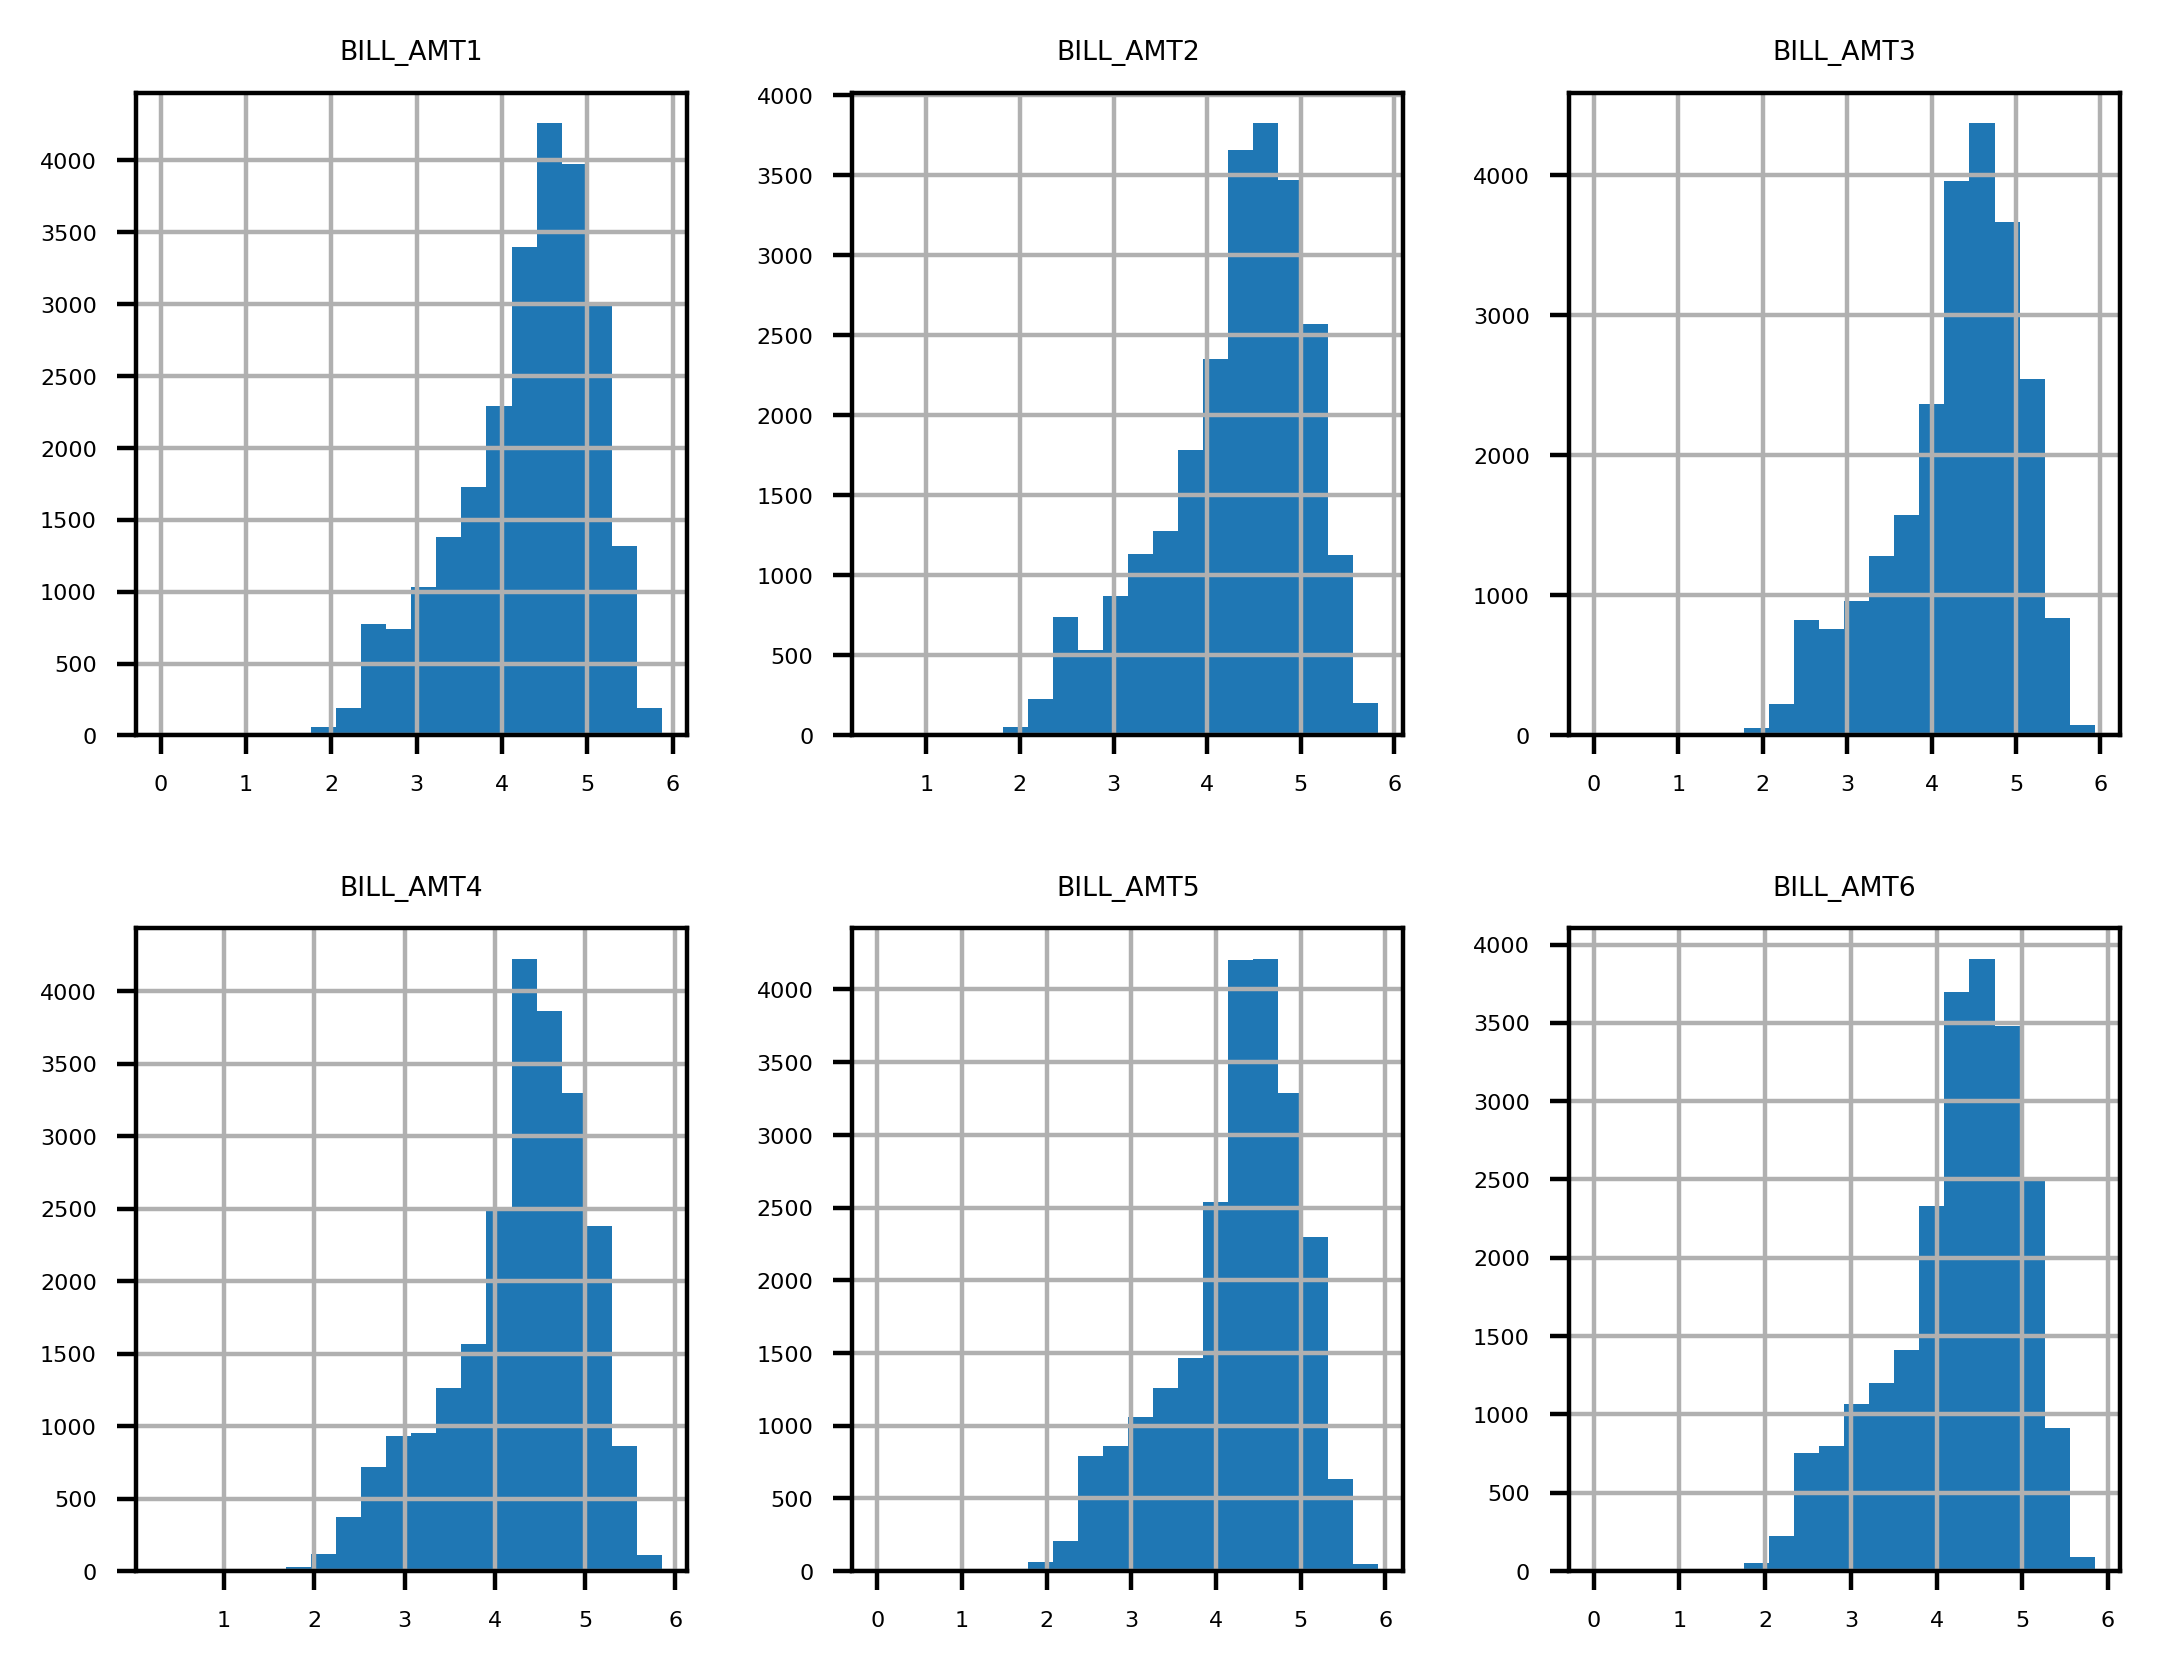

In [55]:
df[bill_feats][~zero_mask_bill].apply(np.log10).hist(bins=20, layout=(2,3))

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

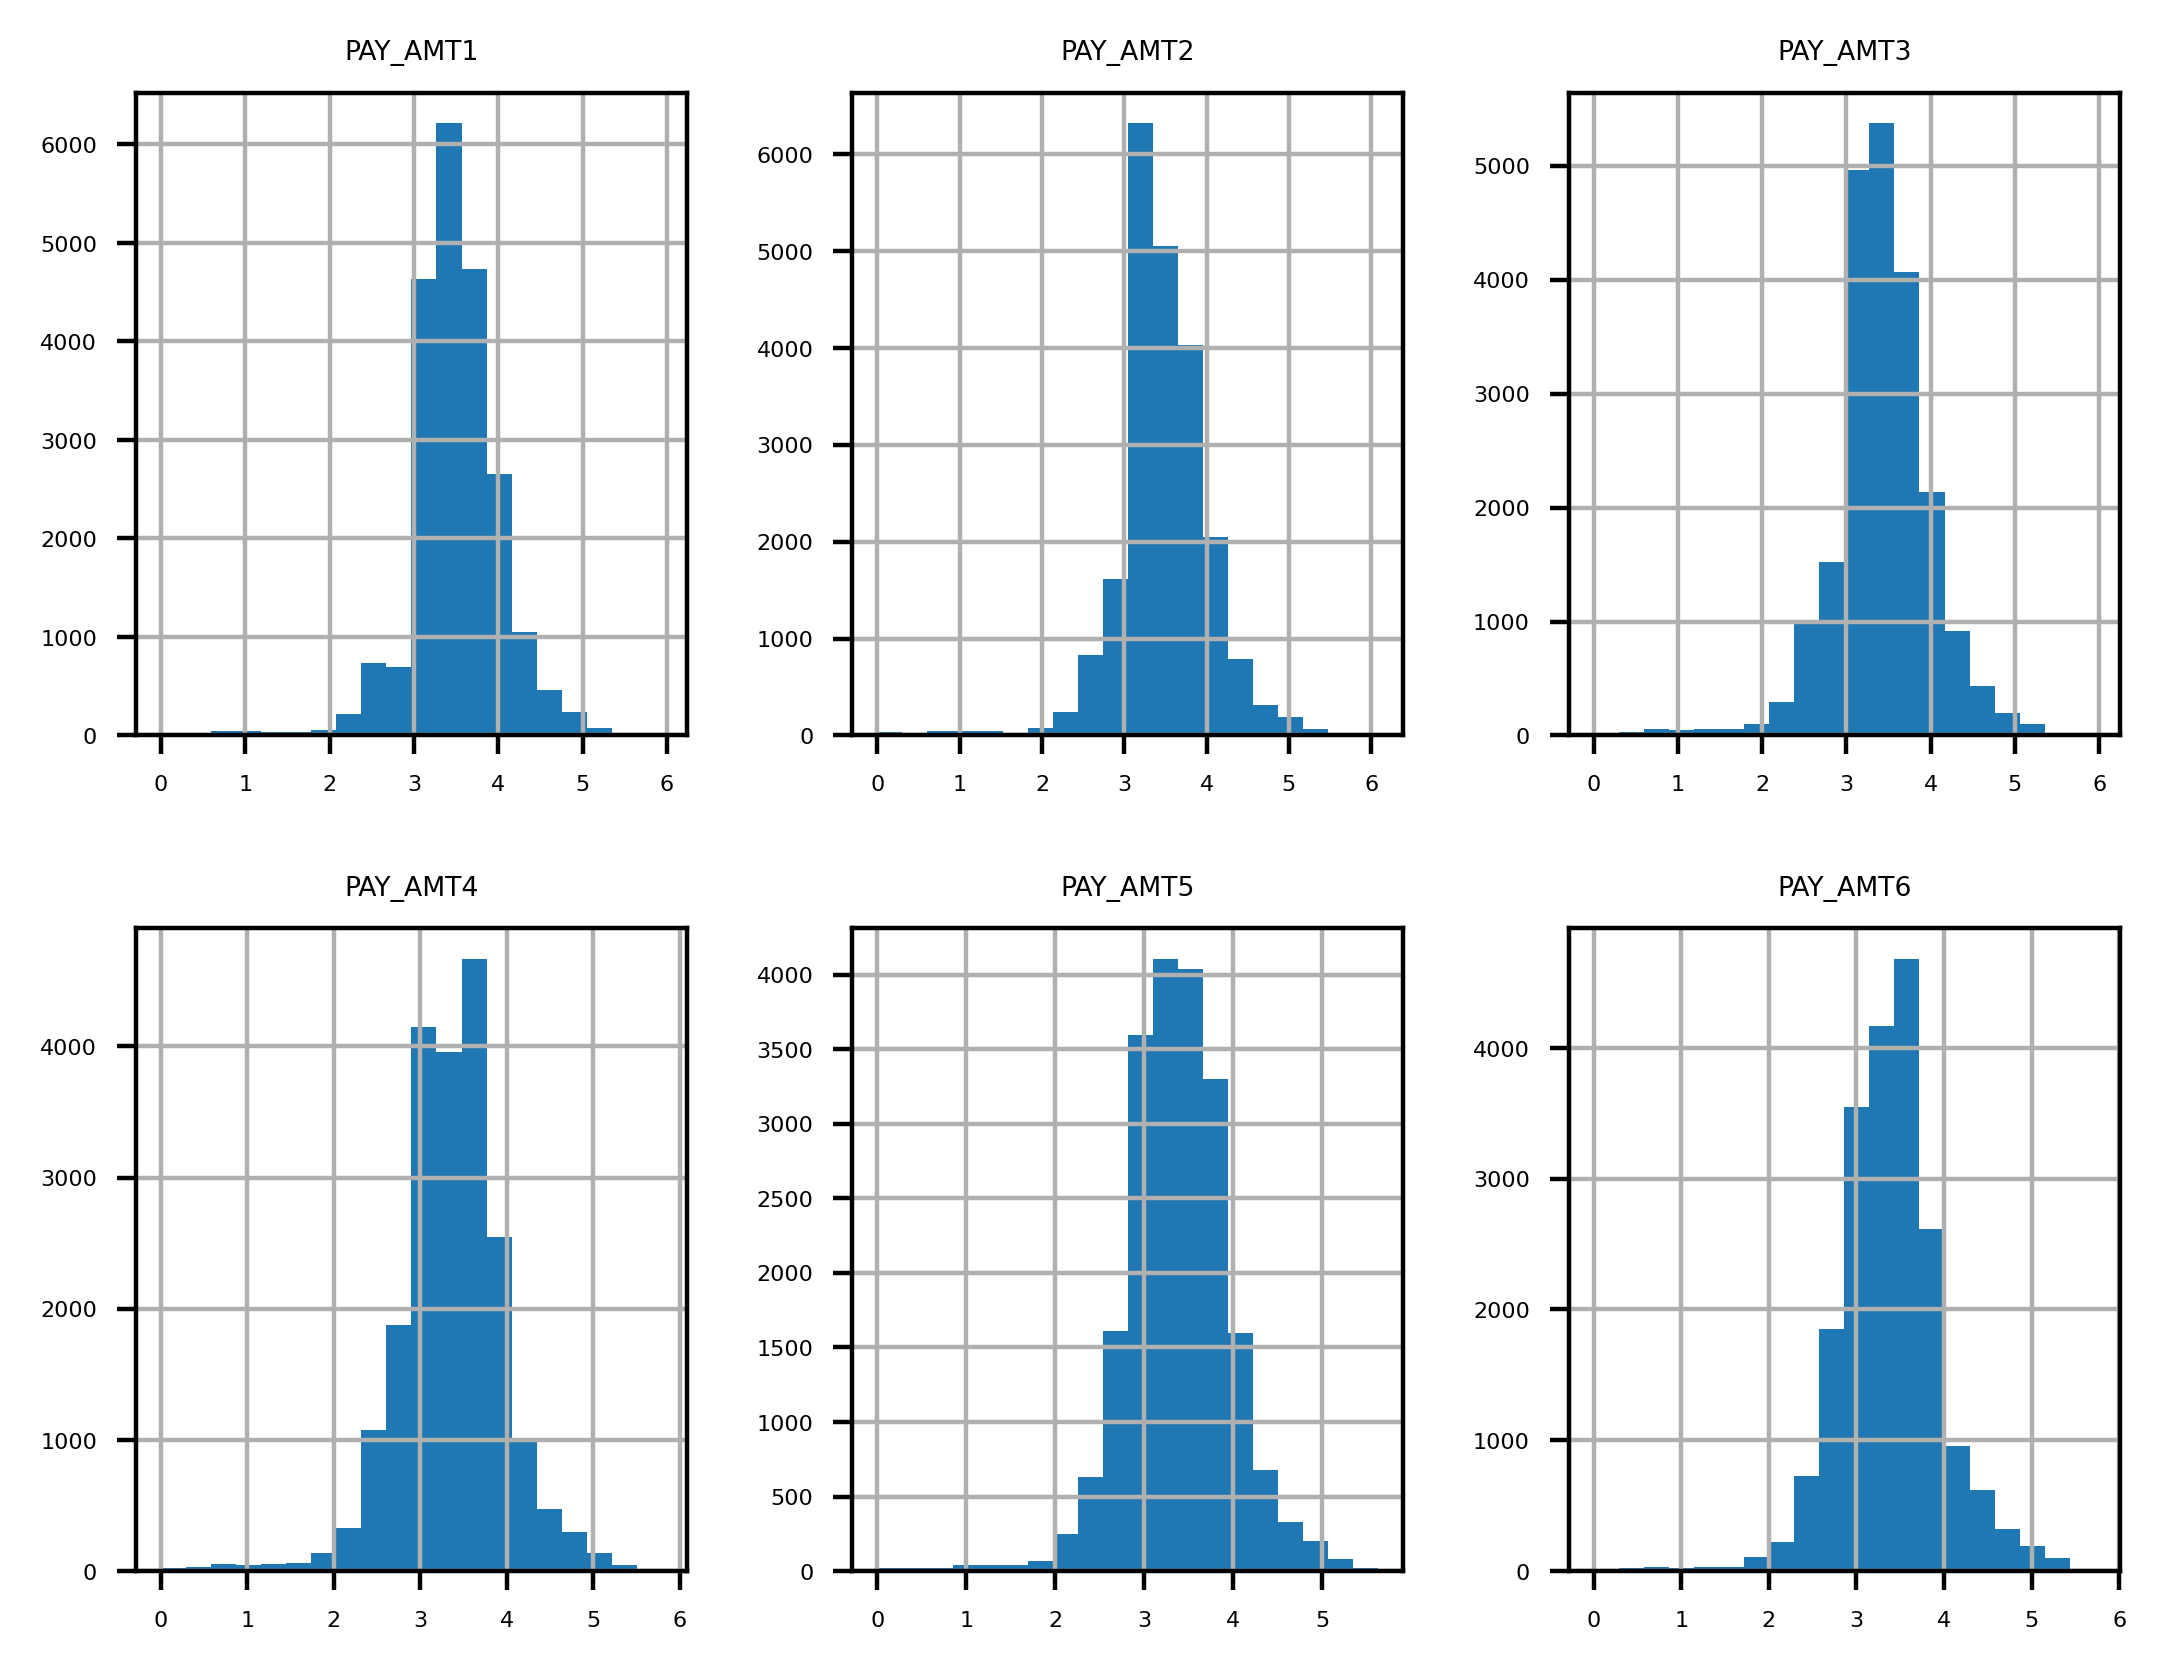

In [56]:
df[amt_feats][~zero_mask_amt].apply(np.log10).hist(bins = 20, layout = (2,3))